<a href="https://colab.research.google.com/github/LEEHYUNJI94/Python/blob/master/Open%20CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Open CV 기본 사용법**


> CoLab에서 파일 업로드
*   파일은 주기적으로 초기화되기 때문에, 계속 업로드 필요


In [8]:
from google.colab import files
uploaded = files.upload()



> OpenCV의 기본적인 함수¶
*   cv2.imread(file_name, flag)
*   cv2.imshow(title, image)
*   cv2.cvtColor(image, flag)


> Matplotlib사용으로 이미지 동작시킬 수 있음 
*   OpenCV는 BGR을 기준, Matplotlib는 RGB 기준







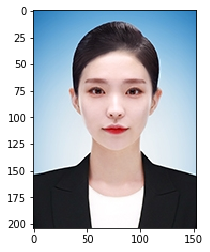

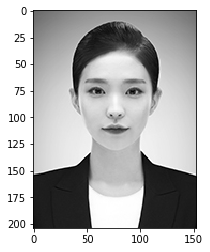

In [18]:
import cv2
import matplotlib.pyplot as plt

img_basic = cv2.imread('LEE HYUNJI POTHO_130 (1).jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))
plt.show()